[ 1  2  3  4  5  6  7  8  9 10]


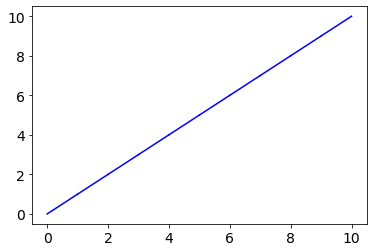

In [18]:
import numpy as np
import matplotlib.pyplot as plt
import imageio
import os

FONTSIZE = 14
GIF_FRAME_RATE = 1
TEMPGIFNAME = 'delme'
MIN_X = 1
MAX_X = 10
XVECT = np.arange(MIN_X, MAX_X+1)
print(XVECT)

file_name = 'test.gif'


fig, axes = plt.subplots()
plt.rc('font', size=FONTSIZE)
tempgiffiles = []
for i_frame in range(10):
    # plot
    axes.plot([i_frame, i_frame+1], [i_frame, i_frame+1], 'b-')
    tempgiffiles.append(TEMPGIFNAME + '%i.png' % i_frame)
    plt.savefig(tempgiffiles[-1])
    
    

with imageio.get_writer(file_name, mode='I', format='GIF-FI', duration=1, quantizer='nq', palettesize=256) as writer:
    for filename in tempgiffiles:
        image = imageio.imread(filename)
        writer.append_data(image)
        os.remove(filename)

    